# Question No.: 01

# Importing Libraries

In [299]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

print('Done!')

Done!



# Input and Target data columns for Solar radiation
Input data contains Temperature, Pressure, Humidity, Wind Direction, Speed, Month, SunPerDayHours as the columns of the matrix respectively. 
Target data is the radiation values. 

In [300]:
X = np.load('Solar_data_input.npy') # Load the input
Y = np.load('Solar_data_target.npy') # Load the target

Column_name = {0: 'Temperature', 1: 'Pressure', 2:'Humidity',3:'Wind Direction',4:'Speed',5:'Month',6:'SunPerDayHours'}

print('Done!')

Done!


In [301]:
print(np.shape(X),np.shape(Y)) # Check dimesions of data

(32685, 7) (32685,)


In [302]:
#reshaping the data
Y = np.reshape(Y,(-1,1))
print(np.shape(X),np.shape(Y))

(32685, 7) (32685, 1)


Text(0.5, 0, 'Speed')

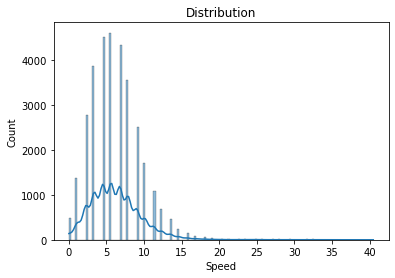

In [303]:
# Choose a column to see the distribution

n_column = 4

fig = sns.histplot(X[:,n_column],kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel(Column_name[n_column])



Text(0.5, 0, 'Target')

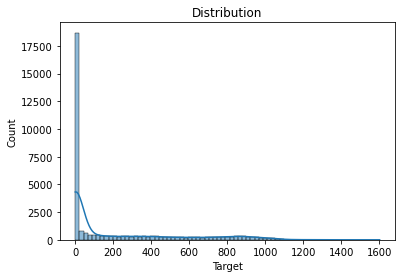

In [304]:
# target distribution
fig = sns.histplot(Y[:,0],kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel('Target')

In [305]:
#Splitting the data
X_tr, X_va, Y_tr,Y_va = train_test_split(X,Y,test_size = 0.25)
print('training set == ', np.shape(X_tr),np.shape(Y_tr),', validation set ==',np.shape(X_va),np.shape(Y_va))

training set ==  (24513, 7) (24513, 1) , validation set == (8172, 7) (8172, 1)


In [306]:
# Standard Normalization

scaler_S = StandardScaler().fit(X_tr)
X_tr_Norm = scaler_S.transform(X_tr)

X_va_Norm = scaler_S.transform(X_va)
print('Done!')

Done!


Text(0.5, 0, 'Humidity')

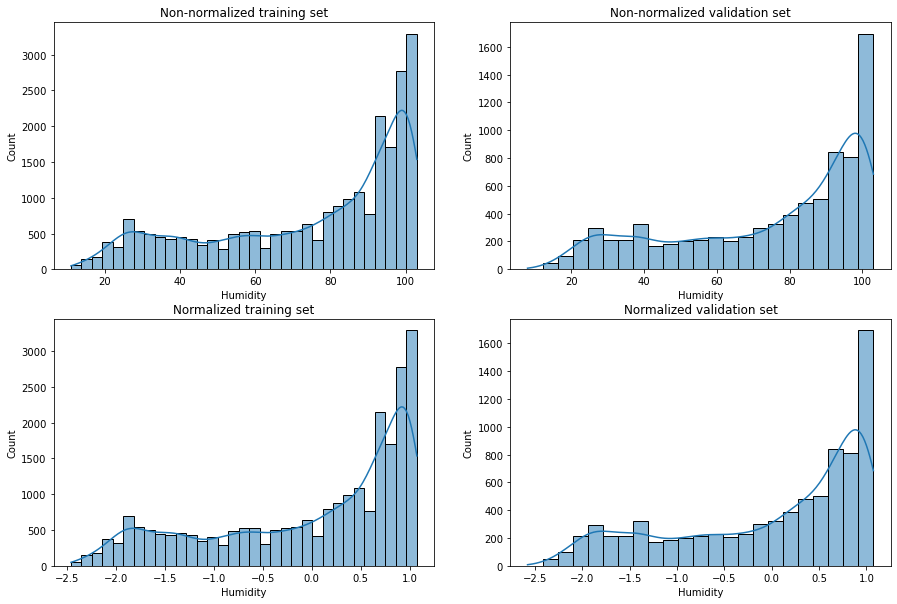

In [307]:
# Comparing th distribution from the normalized training and validation sets

n_column = 2

fig2 = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = sns.histplot(X_tr[:,n_column],kde = 'True')
fig.set_title('Non-normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,2)
fig = sns.histplot(X_va[:,n_column],kde = 'True')
fig.set_title('Non-normalized validation set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,3)
fig = sns.histplot(X_tr_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,4)
fig = sns.histplot(X_va_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized validation set')
fig.set_xlabel(Column_name[n_column])

In [308]:
print(np.shape(Y_va))

(8172, 1)


In [309]:
#max_rad_val = max(Y_tr)+10
max_rad_val = 1700 # maximum value of radiation to use in plots; handy for changing value used in multiple places 
neigh_val = 10; # value of K
p_val = 5 # value of p

reg = KNeighborsRegressor(n_neighbors=neigh_val,p=p_val)

# non-normalized
reg.fit(X_tr, Y_tr)
Y_tr_pred_non = reg.predict(X_tr)
Y_va_pred_non = reg.predict(X_va)

# Normalized
reg.fit(X_tr_Norm, Y_tr) # normalized
Y_tr_pred_Norm = reg.predict(X_tr_Norm)
Y_va_pred_Norm = reg.predict(X_va_Norm)


Text(0.5, 1.0, 'Normalized')

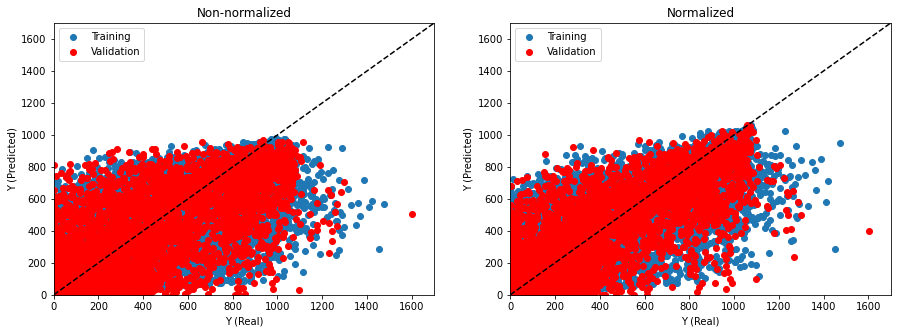

In [310]:
# plots 
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(Y_tr,Y_tr_pred_non,label = 'Training',alpha = 1)
plt.scatter(Y_va,Y_va_pred_non,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y (Real)')
plt.ylabel('Y (Predicted)')
plt.xlim([0,max_rad_val])
plt.ylim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,max_rad_val],'--k')
plt.legend()
plt.title('Non-normalized')

plt.subplot(1,2,2)
plt.scatter(Y_tr,Y_tr_pred_Norm,label = 'Training',alpha = 1)
plt.scatter(Y_va,Y_va_pred_Norm,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y (Real)')
plt.ylabel('Y (Predicted)')
plt.xlim([0,max_rad_val])
plt.ylim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,max_rad_val],'--k')
plt.legend()
plt.title('Normalized')

# Comparing predicted and actual values


Text(0.5, 1.0, 'Normalized')

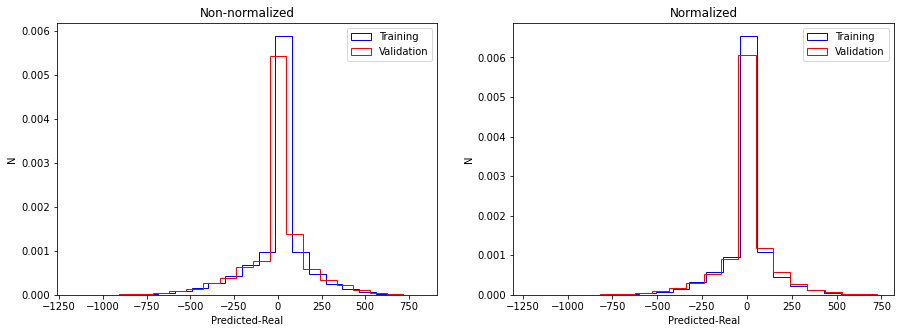

In [311]:
# Inspecting distribution of the difference between the predicted and actual values for the training set
diff_tr_non = Y_tr_pred_non - Y_tr;
diff_va_non = Y_va_pred_non - Y_va;

# difference between predicted and actual values 
diff_tr_Norm = Y_tr_pred_Norm - Y_tr; 
diff_va_Norm = Y_va_pred_Norm - Y_va;


bin_val = 20;

fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(diff_tr_non,bin_val,color='b',histtype = 'step',density=True,label = 'Training')
plt.hist(diff_va_non,bin_val,color='r',histtype = 'step',density=True,label = 'Validation')
plt.xlabel('Predicted-Real')
plt.ylabel('N')
plt.legend()
plt.title('Non-normalized')

plt.subplot(1,2,2)
plt.hist(diff_tr_Norm,bin_val,color='b',histtype = 'step',density=True,label = 'Training')
plt.hist(diff_va_Norm,bin_val,color='r',histtype = 'step',density=True,label = 'Validation')
plt.xlabel('Predicted-Real')
plt.ylabel('N')
plt.legend()
plt.title('Normalized')

# Inspecting systematic errors.

Text(0.5, 1.0, 'Normalized')

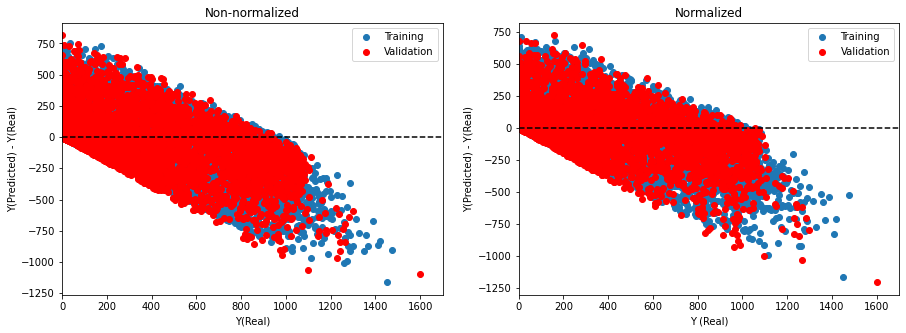

In [312]:
# Inspecting systematic errors
# plots 

fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(Y_tr,diff_tr_non,label = 'Training',alpha = 1)
plt.scatter(Y_va,diff_va_non,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y(Real)')
plt.ylabel('Y(Predicted) - Y(Real)')
plt.xlim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,0],'--k')
plt.legend()
plt.title('Non-normalized')

plt.subplot(1,2,2)
plt.scatter(Y_tr,diff_tr_Norm,label = 'Training',alpha = 1)
plt.scatter(Y_va,diff_va_Norm,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y (Real)')
plt.ylabel('Y(Predicted) - Y(Real)')
plt.xlim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,0],'--k')
plt.legend()
plt.title('Normalized')

# Discussion
There is not a substantial difference between the result obtained from the model in the case of normalized and non-normalized data set; however, the result obtained using the normalized data set is looks slightly better